In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from sklearn.decomposition import PCA

from tqdm import tqdm

from autoencoder import NonLinearAutoencoder
from solver import train_vali_all_epochs, nl_dev_train_vali_all_epochs, test
from model_utils import *

In [2]:
# MNIST normalisation
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_size = int(len(mnist_train) * 0.8)
validation_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, validation_size])

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
validation_loader = DataLoader(mnist_val, batch_size=batch_size, shuffle=False, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [3]:
test_images = []
test_labels = []

for batch_idx, (data, target) in enumerate(test_loader):
    data = Variable(data)
    test_images.append(data)
    test_labels.append(target)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)
test_images = test_images.squeeze(1)

In [21]:
save_path = os.getenv("HOME") + '/mnist_model/test_model/dont_double2/'

In [22]:
def train_dae(save_path):
    dae_model = NonLinearAutoencoder(n_input=784, n_hidden_ls=[512, 128, 16], n_layers=3)
    dae_optimizer = torch.optim.SGD(dae_model.parameters(), lr=0.1, momentum=0.9)

    size_ls = ([4] * 10 +
                [6] * 10 +
                [10] * 10 +
                [16] * 20)

    manner = 'cell_division'

    dae_train_loss, dae_validation_loss = nl_dev_train_vali_all_epochs(
        dae_model, 
        size_ls,
        manner,
        train_loader,
        validation_loader, 
        dae_optimizer, 
        n_epochs=50,
        device=torch.device('cpu'), 
        save_path=save_path+'/'
        )
    
    return dae_model, dae_train_loss, dae_validation_loss

In [24]:
dae_model = train_dae(save_path)

[ 4  4  4  4  4  4  4  4  4  4  6  6  6  6  6  6  6  6  6  6 10 10 10 10
 10 10 10 10 10 10 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.008238: 100%|██████████| 375/375 [00:03<00:00, 94.51it/s]

====> Epoch: 0 Average loss: 1.0021


====> Test set loss: 1.0087
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004065: 100%|██████████| 375/375 [00:04<00:00, 90.75it/s]

====> Epoch: 1 Average loss: 0.6174


====> Test set loss: 0.5237
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003587: 100%|██████████| 375/375 [00:04<00:00, 92.15it/s]

====> Epoch: 2 Average loss: 0.4995


====> Test set loss: 0.4803
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003518: 100%|██████████| 375/375 [00:04<00:00, 92.46it/s]

====> Epoch: 3 Average loss: 0.4643


====> Test set loss: 0.4385
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.002965: 100%|██████████| 375/375 [00:04<00:00, 91.25it/s]

====> Epoch: 4 Average loss: 0.4145


====> Test set loss: 0.4013
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.003034: 100%|██████████| 375/375 [00:04<00:00, 87.21it/s]

====> Epoch: 5 Average loss: 0.3886


====> Test set loss: 0.3802
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.003163: 100%|██████████| 375/375 [00:04<00:00, 93.75it/s]

====> Epoch: 6 Average loss: 0.3734


====> Test set loss: 0.3692
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002704: 100%|██████████| 375/375 [00:03<00:00, 96.39it/s]


====> Epoch: 7 Average loss: 0.3627
====> Test set loss: 0.3594
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002735: 100%|██████████| 375/375 [00:03<00:00, 95.75it/s] 

====> Epoch: 8 Average loss: 0.3545


====> Test set loss: 0.3545
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002659: 100%|██████████| 375/375 [00:03<00:00, 95.57it/s] 

====> Epoch: 9 Average loss: 0.3483


====> Test set loss: 0.3499
Weights saved.
6
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002695: 100%|██████████| 375/375 [00:03<00:00, 94.65it/s]


====> Epoch: 10 Average loss: 0.3480
====> Test set loss: 0.3362
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002569: 100%|██████████| 375/375 [00:03<00:00, 97.39it/s] 

====> Epoch: 11 Average loss: 0.3264


====> Test set loss: 0.3251
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.002330: 100%|██████████| 375/375 [00:04<00:00, 92.79it/s]

====> Epoch: 12 Average loss: 0.3177


====> Test set loss: 0.3168
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.002237: 100%|██████████| 375/375 [00:03<00:00, 98.14it/s] 

====> Epoch: 13 Average loss: 0.3092


====> Test set loss: 0.3045
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.002318: 100%|██████████| 375/375 [00:04<00:00, 92.80it/s]


====> Epoch: 14 Average loss: 0.2944
====> Test set loss: 0.2928
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.002264: 100%|██████████| 375/375 [00:04<00:00, 92.59it/s]

====> Epoch: 15 Average loss: 0.2854


====> Test set loss: 0.2859
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.002336: 100%|██████████| 375/375 [00:03<00:00, 94.92it/s]

====> Epoch: 16 Average loss: 0.2788


====> Test set loss: 0.2797
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.002052: 100%|██████████| 375/375 [00:03<00:00, 96.45it/s] 


====> Epoch: 17 Average loss: 0.2738
====> Test set loss: 0.2761
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.002161: 100%|██████████| 375/375 [00:03<00:00, 97.44it/s] 

====> Epoch: 18 Average loss: 0.2695


====> Test set loss: 0.2723
Weights saved.
6
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.002119: 100%|██████████| 375/375 [00:03<00:00, 97.34it/s] 

====> Epoch: 19 Average loss: 0.2662


====> Test set loss: 0.2701
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.002030: 100%|██████████| 375/375 [00:03<00:00, 95.26it/s] 


====> Epoch: 20 Average loss: 0.2693
====> Test set loss: 0.2611
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001805: 100%|██████████| 375/375 [00:03<00:00, 96.77it/s]

====> Epoch: 21 Average loss: 0.2477


====> Test set loss: 0.2452
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001836: 100%|██████████| 375/375 [00:03<00:00, 97.70it/s]

====> Epoch: 22 Average loss: 0.2356


====> Test set loss: 0.2368
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001761: 100%|██████████| 375/375 [00:03<00:00, 97.13it/s]


====> Epoch: 23 Average loss: 0.2276
====> Test set loss: 0.2287
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001692: 100%|██████████| 375/375 [00:03<00:00, 95.88it/s] 

====> Epoch: 24 Average loss: 0.2217


====> Test set loss: 0.2239
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001629: 100%|██████████| 375/375 [00:04<00:00, 93.21it/s]

====> Epoch: 25 Average loss: 0.2170


====> Test set loss: 0.2195
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001670: 100%|██████████| 375/375 [00:03<00:00, 100.12it/s]

====> Epoch: 26 Average loss: 0.2128


====> Test set loss: 0.2155
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001650: 100%|██████████| 375/375 [00:03<00:00, 96.98it/s] 

====> Epoch: 27 Average loss: 0.2092


====> Test set loss: 0.2122
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001671: 100%|██████████| 375/375 [00:03<00:00, 96.29it/s] 

====> Epoch: 28 Average loss: 0.2061


====> Test set loss: 0.2095
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001631: 100%|██████████| 375/375 [00:04<00:00, 92.54it/s]


====> Epoch: 29 Average loss: 0.2030
====> Test set loss: 0.2070
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001564: 100%|██████████| 375/375 [00:03<00:00, 97.23it/s] 


====> Epoch: 30 Average loss: 0.2118
====> Test set loss: 0.2037
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001370: 100%|██████████| 375/375 [00:03<00:00, 98.75it/s] 

====> Epoch: 31 Average loss: 0.1954


====> Test set loss: 0.1980
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001399: 100%|██████████| 375/375 [00:04<00:00, 91.39it/s]

====> Epoch: 32 Average loss: 0.1896


====> Test set loss: 0.1916
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001446: 100%|██████████| 375/375 [00:03<00:00, 98.41it/s]


====> Epoch: 33 Average loss: 0.1836
====> Test set loss: 0.1850
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.001324: 100%|██████████| 375/375 [00:03<00:00, 95.71it/s] 

====> Epoch: 34 Average loss: 0.1777


====> Test set loss: 0.1798
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.001279: 100%|██████████| 375/375 [00:03<00:00, 95.72it/s]

====> Epoch: 35 Average loss: 0.1730


====> Test set loss: 0.1755
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.001361: 100%|██████████| 375/375 [00:03<00:00, 95.28it/s]

====> Epoch: 36 Average loss: 0.1689


====> Test set loss: 0.1718
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.001270: 100%|██████████| 375/375 [00:03<00:00, 96.22it/s] 

====> Epoch: 37 Average loss: 0.1653


====> Test set loss: 0.1687
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.001369: 100%|██████████| 375/375 [00:03<00:00, 100.64it/s]

====> Epoch: 38 Average loss: 0.1622


====> Test set loss: 0.1653
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.001230: 100%|██████████| 375/375 [00:03<00:00, 98.42it/s] 

====> Epoch: 39 Average loss: 0.1594


====> Test set loss: 0.1632
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.001202: 100%|██████████| 375/375 [00:03<00:00, 95.08it/s]

====> Epoch: 40 Average loss: 0.1570


====> Test set loss: 0.1606
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.001246: 100%|██████████| 375/375 [00:03<00:00, 99.27it/s] 


====> Epoch: 41 Average loss: 0.1547
====> Test set loss: 0.1587
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.001214: 100%|██████████| 375/375 [00:03<00:00, 98.89it/s] 

====> Epoch: 42 Average loss: 0.1526


====> Test set loss: 0.1565
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.001199: 100%|██████████| 375/375 [00:03<00:00, 98.66it/s] 

====> Epoch: 43 Average loss: 0.1507


====> Test set loss: 0.1543
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.001204: 100%|██████████| 375/375 [00:03<00:00, 96.41it/s] 

====> Epoch: 44 Average loss: 0.1491


====> Test set loss: 0.1525
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.001177: 100%|██████████| 375/375 [00:03<00:00, 96.45it/s]

====> Epoch: 45 Average loss: 0.1474


====> Test set loss: 0.1513
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.001237: 100%|██████████| 375/375 [00:03<00:00, 96.78it/s]

====> Epoch: 46 Average loss: 0.1460


====> Test set loss: 0.1507
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.001134: 100%|██████████| 375/375 [00:03<00:00, 96.40it/s]

====> Epoch: 47 Average loss: 0.1445


====> Test set loss: 0.1492
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.001191: 100%|██████████| 375/375 [00:03<00:00, 98.34it/s] 

====> Epoch: 48 Average loss: 0.1431


====> Test set loss: 0.1480
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.001077: 100%|██████████| 375/375 [00:03<00:00, 94.95it/s] 

====> Epoch: 49 Average loss: 0.1419


====> Test set loss: 0.1468
Weights saved.
All train losses saved.


In [37]:
dae_model[0].parameters

<bound method Module.parameters of NonLinearAutoencoder(
  (encoder): Sequential(
    (encoder_1): Linear(in_features=784, out_features=512, bias=True)
    (activation_1): ReLU()
    (encoder_2): Linear(in_features=512, out_features=128, bias=True)
    (activation_2): ReLU()
    (encoder_3): Linear(in_features=128, out_features=16, bias=True)
    (activation_3): ReLU()
  )
  (decoder): Sequential(
    (decoder_1): Linear(in_features=16, out_features=128, bias=True)
    (activation_1): ReLU()
    (decoder_2): Linear(in_features=128, out_features=512, bias=True)
    (activation_2): ReLU()
    (decoder_3): Linear(in_features=512, out_features=784, bias=True)
  )
)>

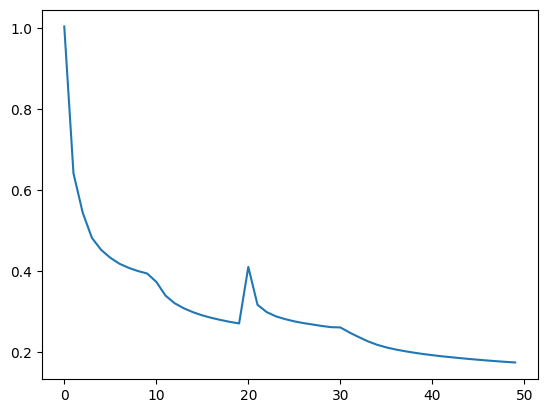

In [38]:
plt.plot(dae_model[1], label='train')


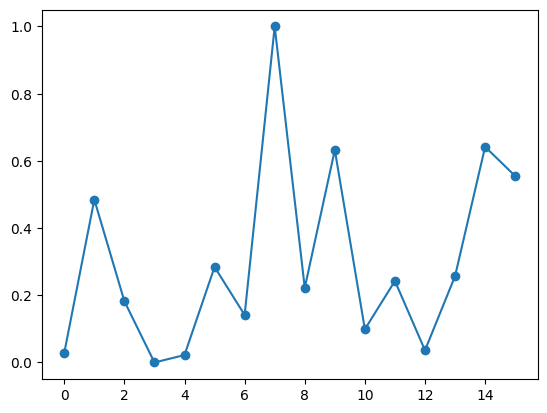

In [ ]:
# avg encoding plot

In [6]:
size_ls = ([4] * 10 +
            [6] * 10 +
            [10] * 10 +
            [16] * 20)

In [25]:
model_type = 'dae'
all_angles = []

for model in range(1):
    latent_matrices = []
    for epoch in tqdm(range(50), leave=True):
        latent_matrix = []
        model_path = f"/home/david/mnist_model/test_model/dont_double2/"
        ae = load_model(model_path, model_type=model_type, epoch=epoch, size_ls=size_ls)
        
        for image in test_images:
            image = torch.tensor(image, dtype=torch.float32).reshape(-1)

            with torch.no_grad():
                encoded, _ = ae(image)
                latent_matrix.append(encoded.detach().numpy())
        
        latent_matrix = np.stack(latent_matrix)

        pca = PCA(n_components=size_ls[epoch])
        pca.fit(latent_matrix)

        pca_components = np.pad(pca.components_, (0, 16 - pca.components_.shape[0]), 'constant')
        latent_matrices.append(pca_components)

    angles_per_model = []
    for i in range(16):
        angles_per_pc = []
        for j in range(49):
            cosine_angle = cosine_angle_between_pcs(latent_matrices[j][i], latent_matrices[j+1][i])
            angles_per_pc.append(cosine_angle)
        angles_per_model.append(angles_per_pc)
    all_angles.append(angles_per_model)

  0%|          | 0/50 [00:00<?, ?it/s]/home/david/Documents/UNI_LOCAL/developing-autoencoders/model_utils.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torc

In [13]:
np.array(all_angles).shape

(1, 16, 49)

In [26]:
angle_matrix = np.array(all_angles).squeeze()

In [27]:
highlighted_non_computable_angles = angle_matrix.copy()

for i in range(highlighted_non_computable_angles.shape[0]):
    for j in range(highlighted_non_computable_angles.shape[1] - 1):
        if np.isnan(highlighted_non_computable_angles[i, j]) and not np.isnan(highlighted_non_computable_angles[i, j + 1]):
            highlighted_non_computable_angles[i, j] = 100

mask = highlighted_non_computable_angles == 100
non_computable_cells = np.where(mask, 1, np.nan)

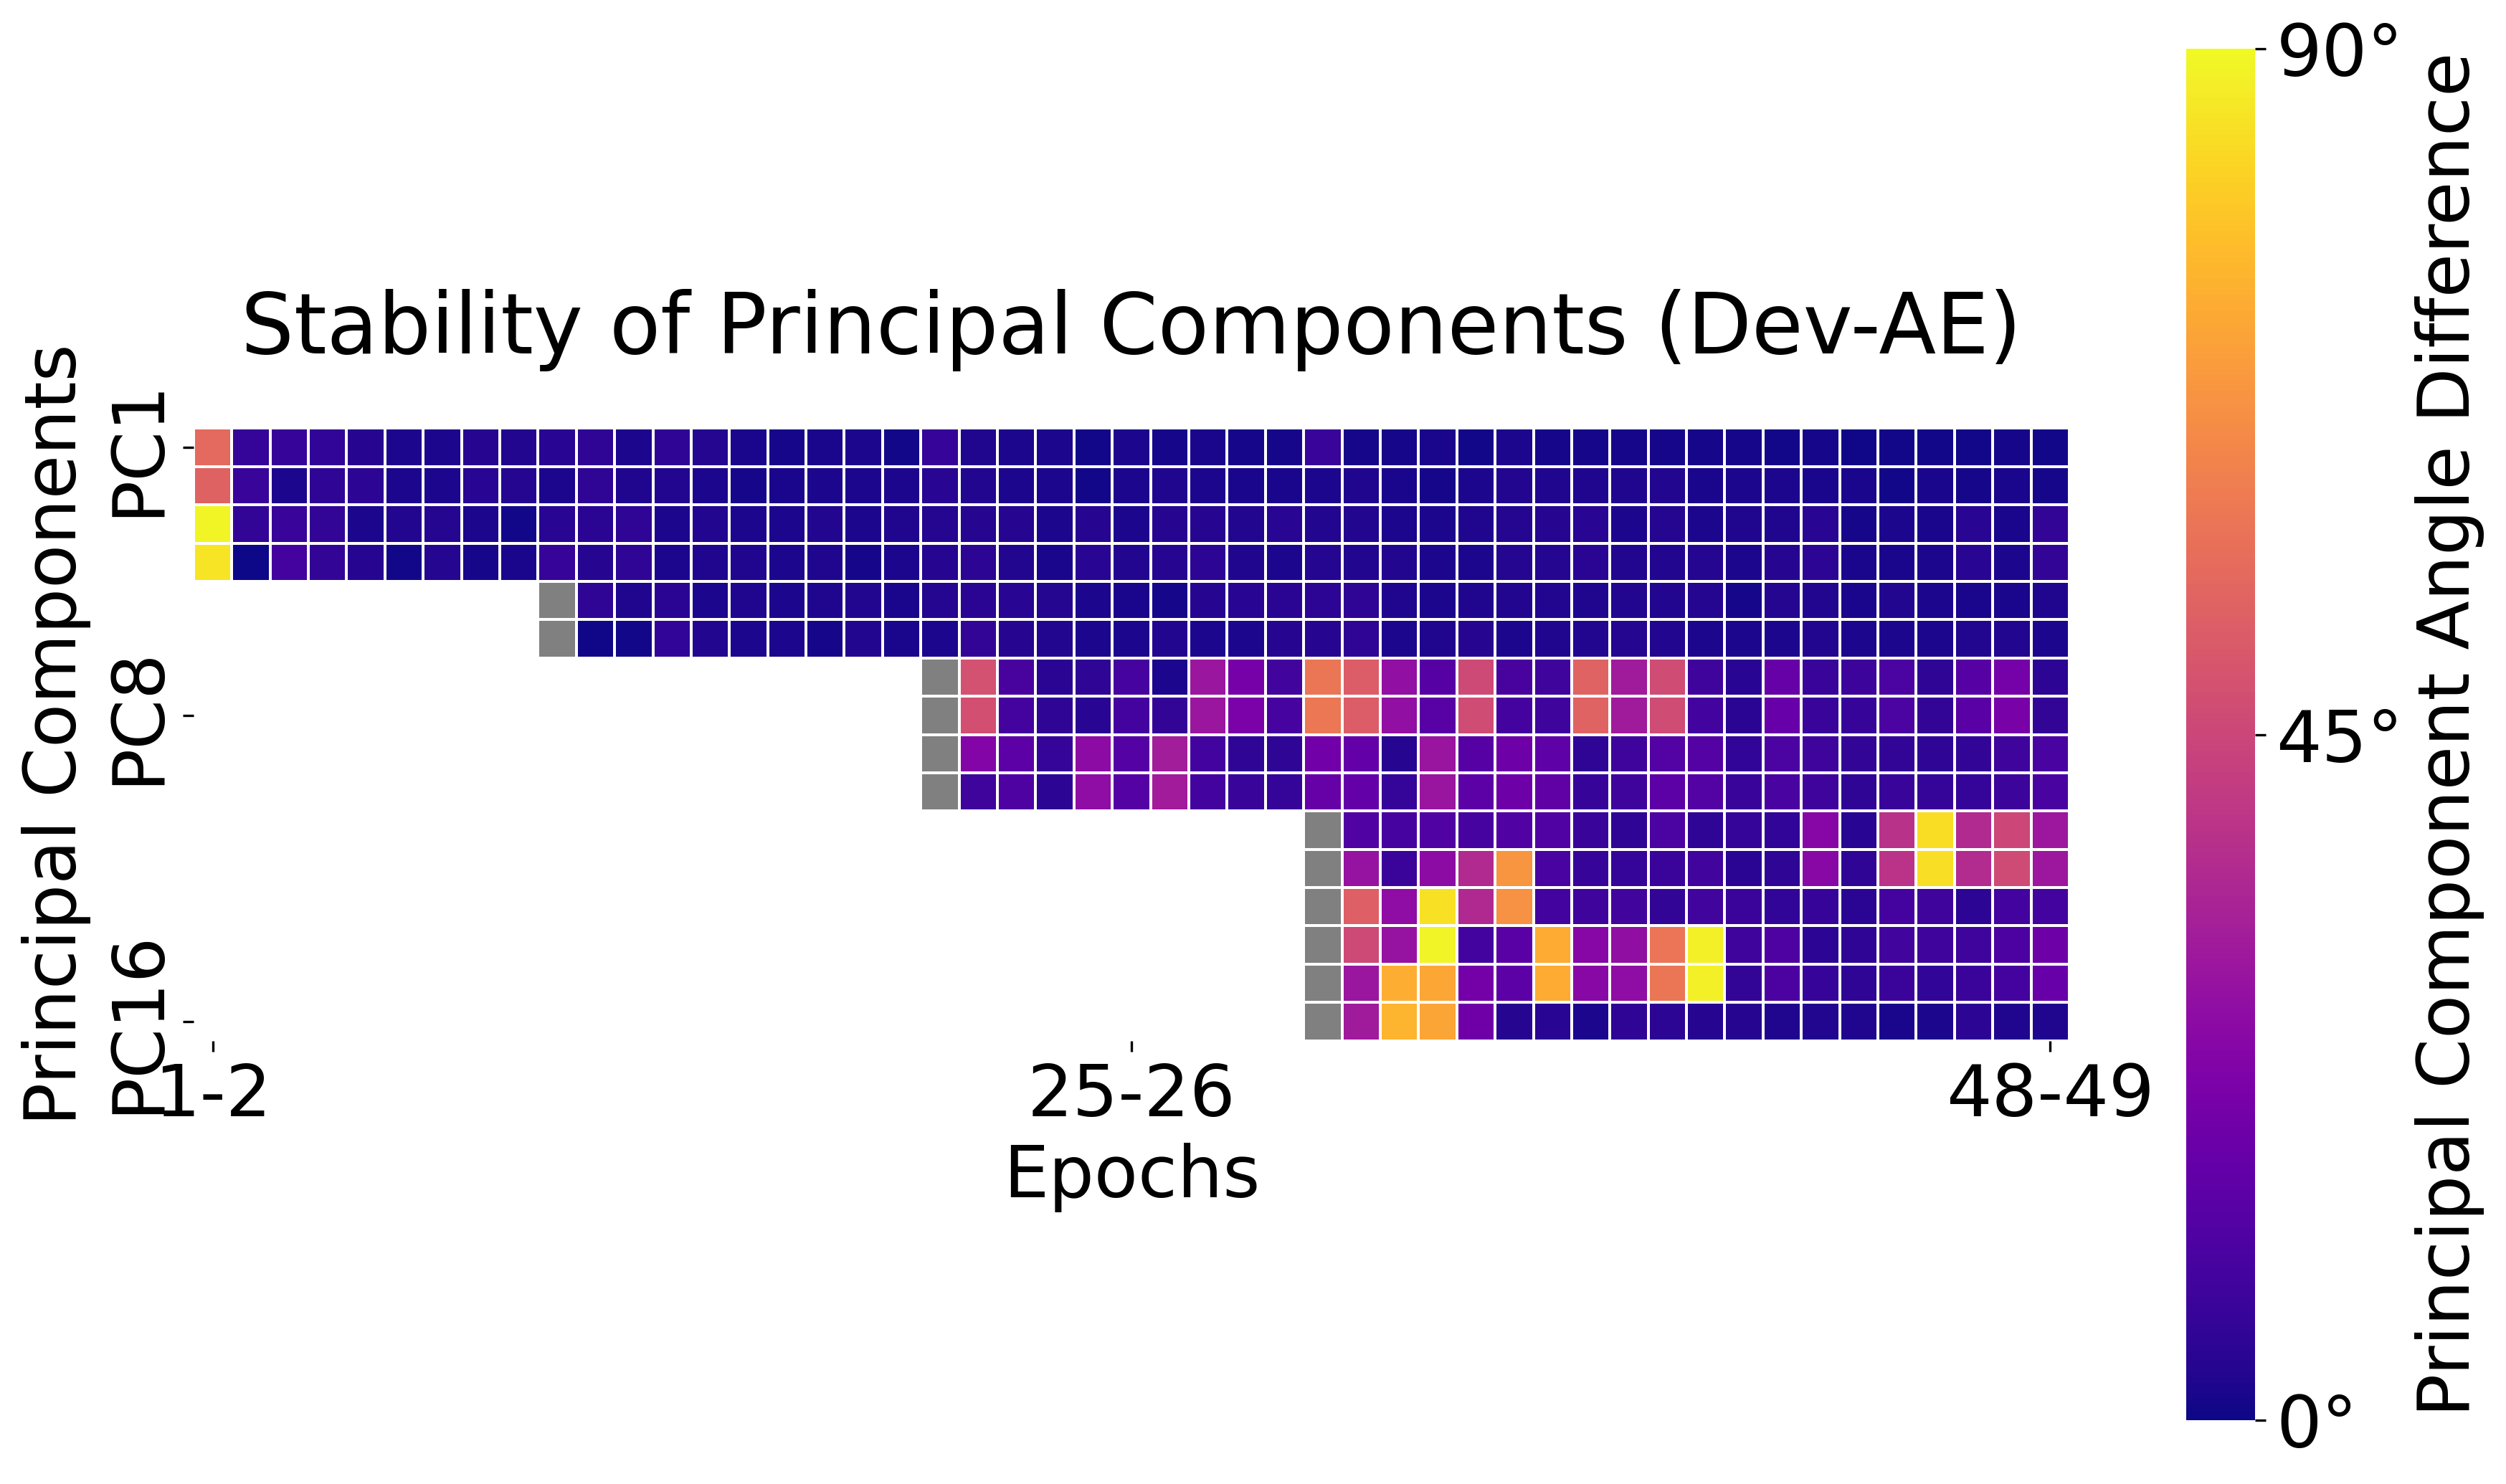

In [28]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

heatmap = sns.heatmap(
    angle_matrix,
    cmap="plasma",
    vmin=0,
    vmax=90,
    cbar_kws={"label": "Angle between PCs"},
    linewidths=0.5,
    square=True,
)

cmap_grey = ListedColormap(['grey'])
sns.heatmap(
    non_computable_cells[:, :50],
    cmap=cmap_grey,
    cbar=False,
    alpha=1,
    linewidths=0.5,
    square=True,
)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([0, 45, 90])
cbar.set_ticklabels(["0°", "45°", "90°"], fontsize=24)
cbar.set_label("Principal Component Angle Difference", fontsize=24)
cbar.minorticks_off()

ax.set_xticks([0.5, 24.5, 48.5])
ax.set_xticklabels(["1-2", "25-26", "48-49"], fontsize=24, rotation=0)

ax.set_yticks([0.5, 7.5, 15.5])
ax.set_yticklabels(["PC1", "PC8", "PC16"], fontsize=24, rotation=90)

ax.set_title("Stability of Principal Components (Dev-AE)", fontsize=28, pad=25)
ax.set_xlabel("Epochs", fontsize=24)
ax.set_ylabel("Principal Components", fontsize=24)

plt.tight_layout()
plt.show()

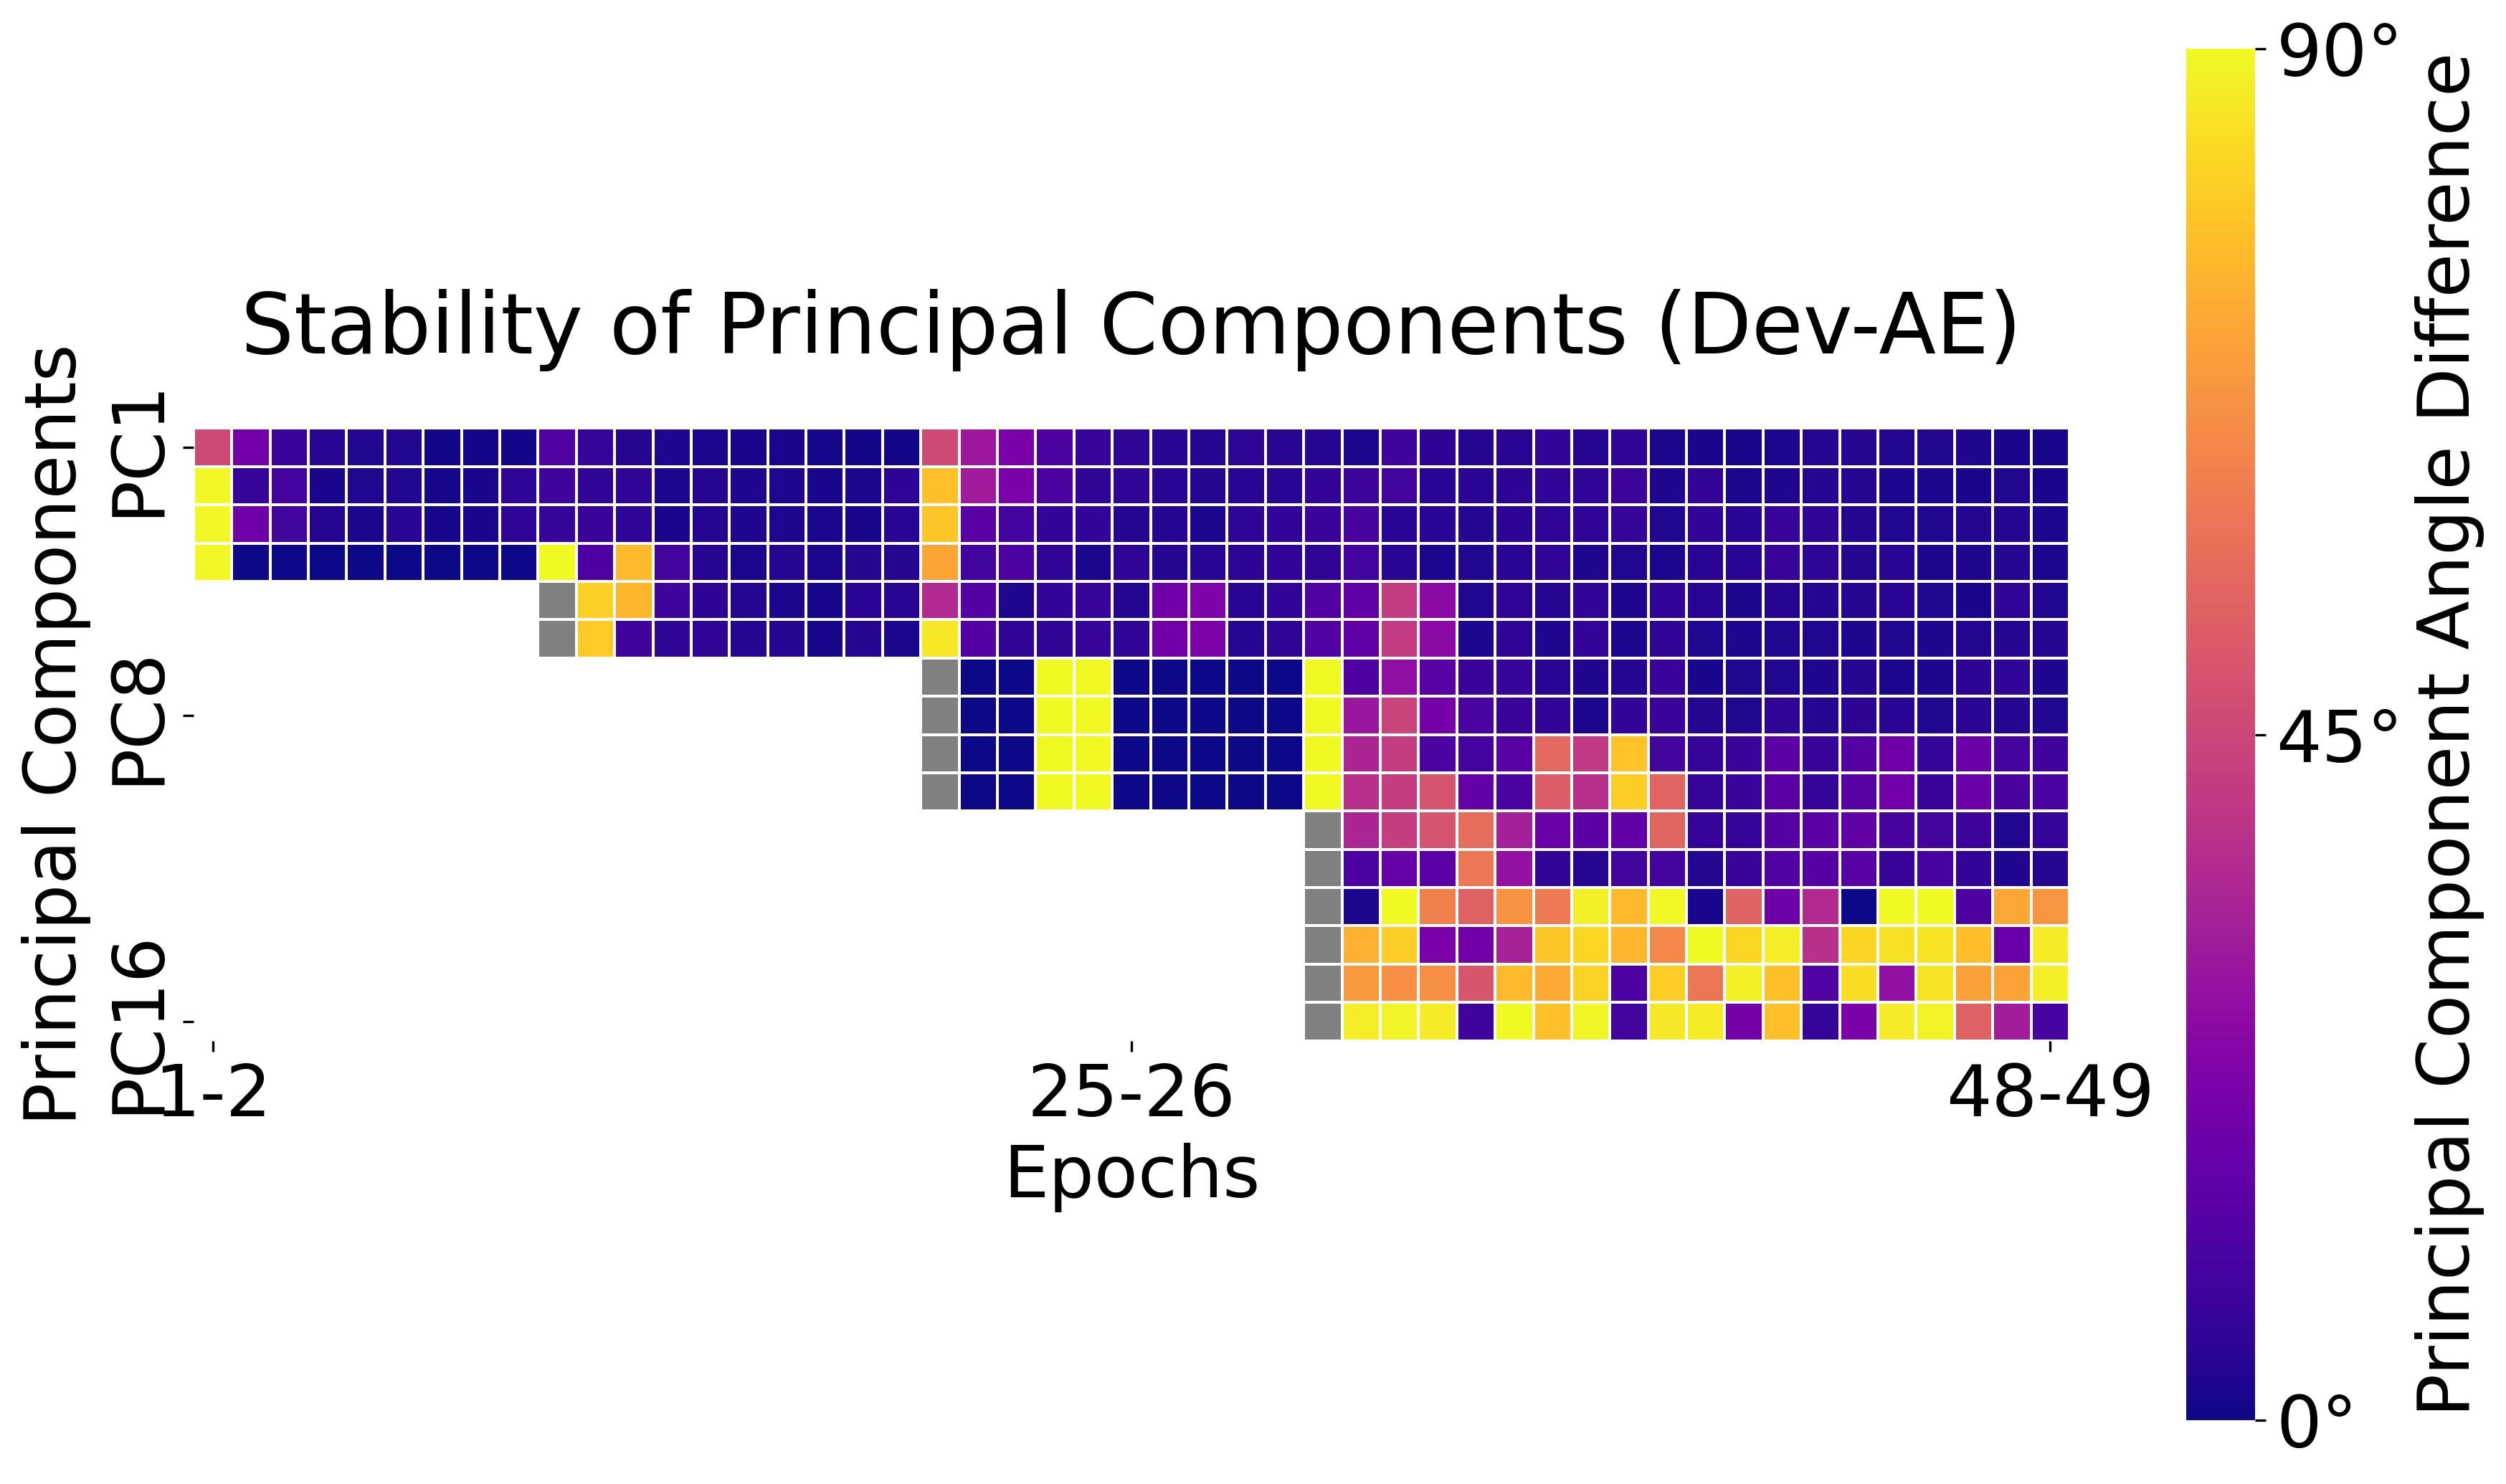

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

heatmap = sns.heatmap(
    angle_matrix,
    cmap="plasma",
    vmin=0,
    vmax=90,
    cbar_kws={"label": "Angle between PCs"},
    linewidths=0.5,
    square=True,
)

cmap_grey = ListedColormap(['grey'])
sns.heatmap(
    non_computable_cells[:, :50],
    cmap=cmap_grey,
    cbar=False,
    alpha=1,
    linewidths=0.5,
    square=True,
)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([0, 45, 90])
cbar.set_ticklabels(["0°", "45°", "90°"], fontsize=24)
cbar.set_label("Principal Component Angle Difference", fontsize=24)
cbar.minorticks_off()

ax.set_xticks([0.5, 24.5, 48.5])
ax.set_xticklabels(["1-2", "25-26", "48-49"], fontsize=24, rotation=0)

ax.set_yticks([0.5, 7.5, 15.5])
ax.set_yticklabels(["PC1", "PC8", "PC16"], fontsize=24, rotation=90)

ax.set_title("Stability of Principal Components (Dev-AE)", fontsize=28, pad=25)
ax.set_xlabel("Epochs", fontsize=24)
ax.set_ylabel("Principal Components", fontsize=24)

plt.tight_layout()
plt.show()